In [68]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

In [70]:
df_cancer = pd.read_csv("/content/drive/My Drive/AEmeritusFiles/Breast_cancer_data.csv")
df_cancer.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [71]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [72]:
df_cancer.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


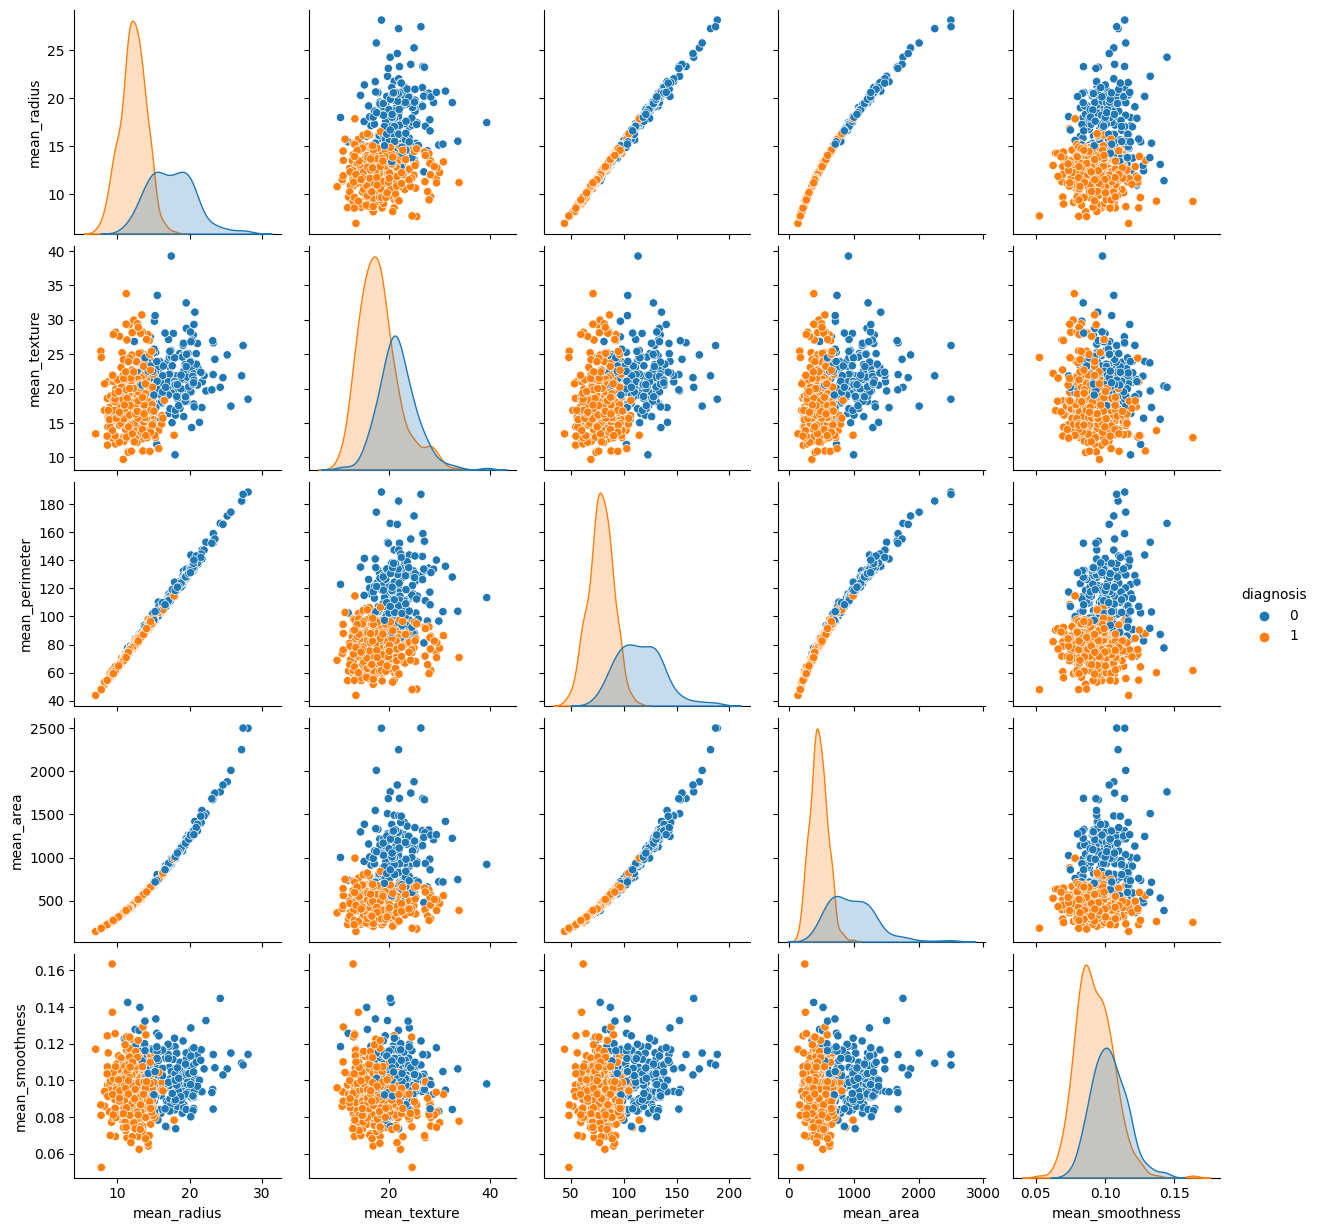

In [73]:
sns.pairplot(df_cancer, hue = 'diagnosis')

<Axes: >

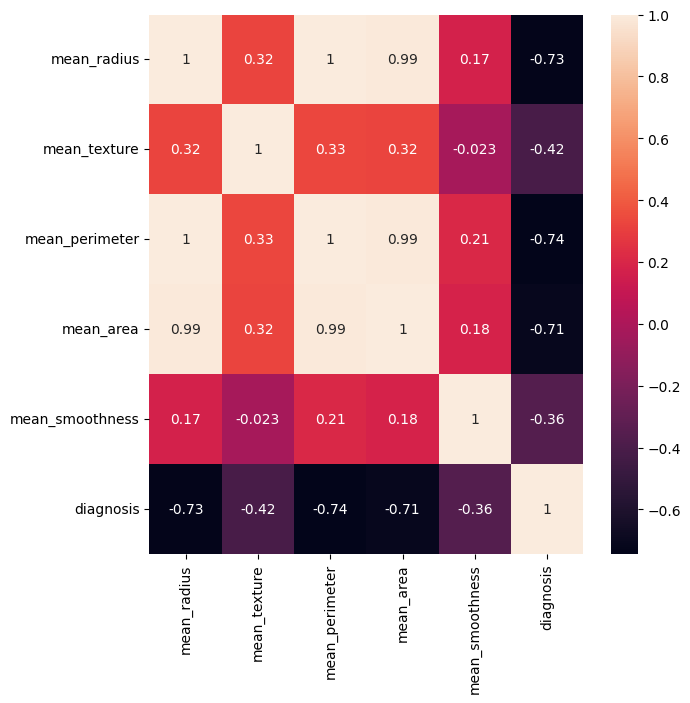

In [74]:
plt.figure(figsize=(7,7))
sns.heatmap(df_cancer['mean_radius mean_texture mean_perimeter mean_area mean_smoothness diagnosis'.split()].corr(), annot=True)

<Axes: xlabel='mean_texture', ylabel='mean_perimeter'>

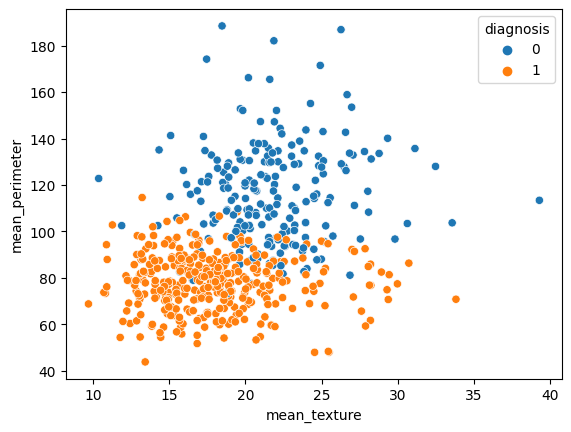

In [75]:
sns.scatterplot(x = 'mean_texture', y = 'mean_perimeter', hue = 'diagnosis', data = df_cancer)

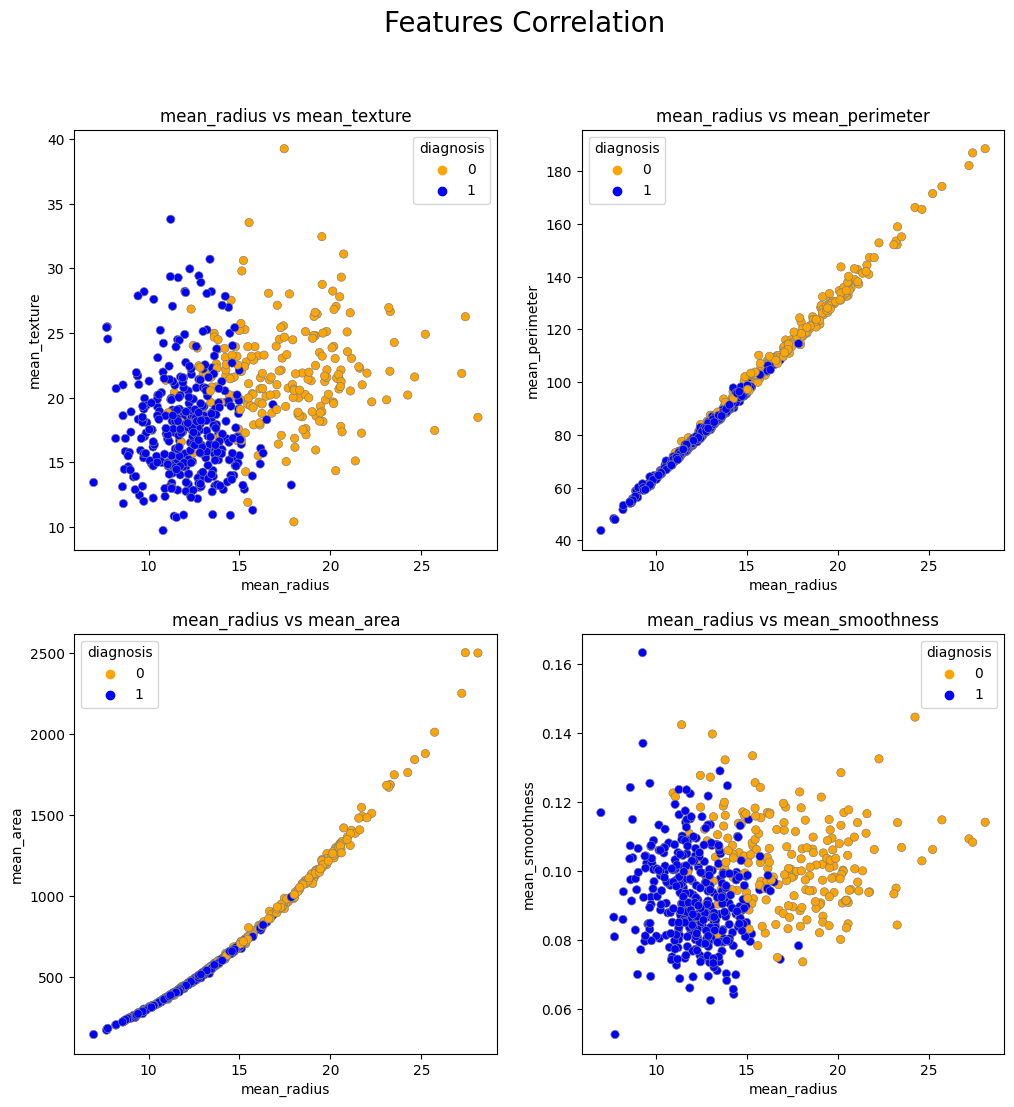

In [76]:
#Look at the correlation of all the features
palette ={0 : 'orange', 1 : 'blue'}
edgecolor = 'grey'
fig = plt.figure(figsize=(12,12))
plt.subplot(221)
ax1 = sns.scatterplot(x = df_cancer['mean_radius'], y = df_cancer['mean_texture'], hue = "diagnosis",
data = df_cancer, palette =palette, edgecolor=edgecolor)
plt.title('mean_radius vs mean_texture')
plt.subplot(222)
ax2 = sns.scatterplot(x = df_cancer['mean_radius'], y = df_cancer['mean_perimeter'], hue = "diagnosis",
data = df_cancer, palette =palette, edgecolor=edgecolor)
plt.title('mean_radius vs mean_perimeter')
plt.subplot(223)
ax3 = sns.scatterplot(x = df_cancer['mean_radius'], y = df_cancer['mean_area'], hue = "diagnosis",
data = df_cancer, palette =palette, edgecolor=edgecolor)
plt.title('mean_radius vs mean_area')
plt.subplot(224)
ax4 = sns.scatterplot(x = df_cancer['mean_radius'], y = df_cancer['mean_smoothness'], hue = "diagnosis",
data = df_cancer, palette =palette, edgecolor=edgecolor)
plt.title('mean_radius vs mean_smoothness')
fig.suptitle('Features Correlation', fontsize = 20)
plt.savefig('2')
plt.show()


In [77]:
# check if any missing values
df_cancer.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [78]:
df_cancer['diagnosis'].unique()

array([0, 1])

In [79]:
df_cancer['diagnosis'] = df_cancer['diagnosis'].map({0:'benign',1:'malignant'})

In [80]:
df_cancer.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,benign
1,20.57,17.77,132.90,1326.0,0.08474,benign
2,19.69,21.25,130.00,1203.0,0.10960,benign
3,11.42,20.38,77.58,386.1,0.14250,benign
4,20.29,14.34,135.10,1297.0,0.10030,benign


Text(0.5, 1.0, 'number of Benign vs Malignant')

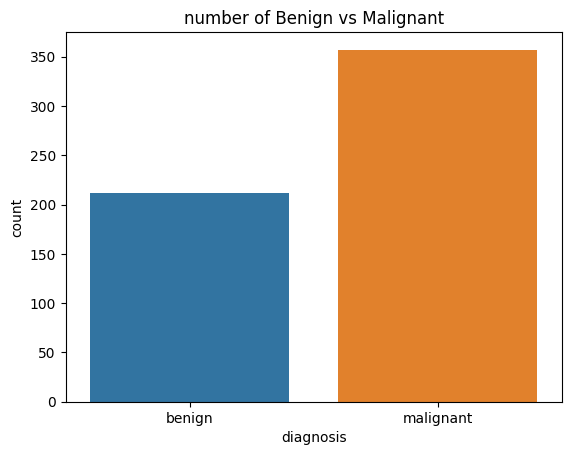

In [81]:
sns.countplot(x='diagnosis',data = df_cancer)
plt.title('number of Benign vs Malignant')

In [82]:
X = df_cancer.drop(['diagnosis'],axis=1).values
y = df_cancer['diagnosis'].values

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [84]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

<Axes: >

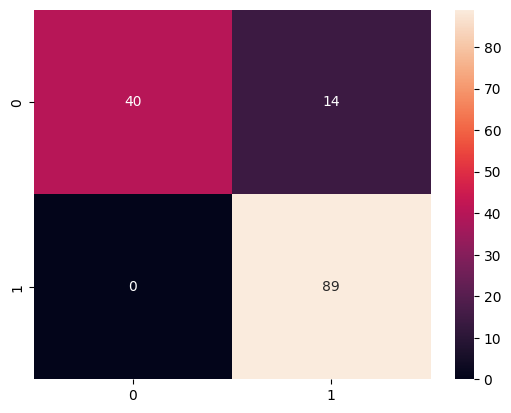

In [85]:

y_predict = svc_model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)

In [86]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

      benign       1.00      0.74      0.85        54
   malignant       0.86      1.00      0.93        89

    accuracy                           0.90       143
   macro avg       0.93      0.87      0.89       143
weighted avg       0.92      0.90      0.90       143



In [87]:
# Applying normalization to all features
n_scaler = MinMaxScaler()
X_train_scaled = n_scaler.fit_transform(X_train.astype(float))
X_test_scaled = n_scaler.transform(X_test.astype(float))

<Axes: >

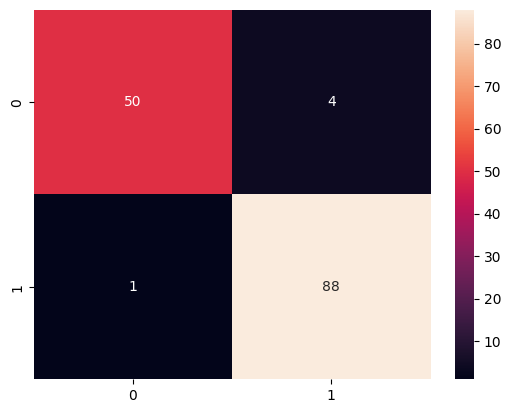

In [88]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train_scaled, y_train)
from sklearn.metrics import classification_report, confusion_matrix
y_predict_scaled = svc_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_predict_scaled)
sns.heatmap(cm, annot=True)

In [89]:
print(classification_report(y_test, y_predict_scaled))

              precision    recall  f1-score   support

      benign       0.98      0.93      0.95        54
   malignant       0.96      0.99      0.97        89

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



Refer here for the various parameters
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [90]:
#finding best hyperparameters c and gamma
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.001], 'kernel':['rbf', 'poly','sigmoid']}
grid = GridSearchCV(SVC(),param_grid,verbose = 4)
grid.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.837 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.847 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.976 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.847 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.871 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.837 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.859 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.965 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.847 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.835 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.628 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=4)

In [91]:
grid.best_params_

{'C': 1000, 'gamma': 0.1, 'kernel': 'sigmoid'}

In [92]:
grid.best_estimator_

SVC(C=1000, gamma=0.1, kernel='sigmoid')

In [93]:
grid_predictions = grid.predict(X_test_scaled)

<Axes: >

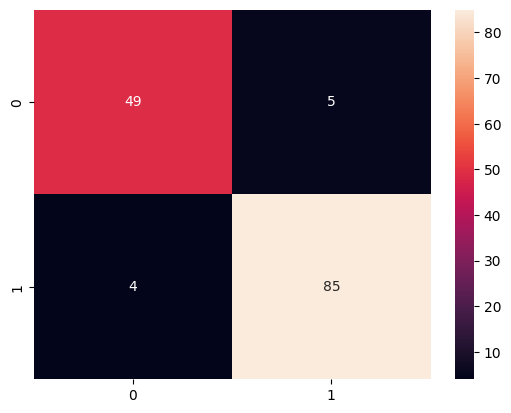

In [94]:
cmG = confusion_matrix(y_test,grid_predictions)
sns.heatmap(cmG, annot=True)

In [95]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

      benign       0.92      0.91      0.92        54
   malignant       0.94      0.96      0.95        89

    accuracy                           0.94       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143

